# Group Project Proposal

In [11]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [12]:
# 1 page (max 500 words)

## Introduction

Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
Clearly state the question you will try to answer with your project
Identify and describe the dataset that will be used to answer the question

## Preliminary Exploratory Data Analysis

Demonstrate that the dataset can be read from the web into R
Clean and wrangle your data into a tidy format
Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.info.txt

In [27]:
# Load data set from the web
card_data <- read_delim("cardio_train.csv", delim = ";")
card_data2 <- read_csv("http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data")
card_data
card_data2

Parsed with column specification:
cols(
  id = col_double(),
  age = col_double(),
  gender = col_double(),
  height = col_double(),
  weight = col_double(),
  ap_hi = col_double(),
  ap_lo = col_double(),
  cholesterol = col_double(),
  gluc = col_double(),
  smoke = col_double(),
  alco = col_double(),
  active = col_double(),
  cardio = col_double()
)

Parsed with column specification:
cols(
  row.names = col_double(),
  sbp = col_double(),
  tobacco = col_double(),
  ldl = col_double(),
  adiposity = col_double(),
  famhist = col_character(),
  typea = col_double(),
  obesity = col_double(),
  alcohol = col_double(),
  age = col_double(),
  chd = col_double()
)



id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
99996,19066,2,183,105,180,90,3,1,0,1,0,1
99998,22431,1,163,72,135,80,1,2,0,0,0,1
99999,20540,1,170,72,120,80,2,1,0,0,1,0


row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
461,108,3.0,1.59,15.23,Absent,40,20.09,26.64,55,0
462,118,5.4,11.61,30.79,Absent,64,27.35,23.97,40,0
463,132,0.0,4.82,33.41,Present,62,14.70,0.00,46,1


In [25]:
card_data <- card_data %>%
    mutate(cholesterol = as_factor(cholesterol),
           gluc = as_factor(gluc),
           smoke = as_factor(smoke),
           alco = as_factor(alco),
           active = as_factor(active),
           cardio = as_factor(cardio),
           age = age / 365,
           bmi = weight / (height/100)^2)
# card_data

card_data2 <- card_data2 %>%
    mutate(chd = as_factor(chd))
card_data2

# card_sample <- card_data %>%
#     sample_n(250)

row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
461,108,3.0,1.59,15.23,Absent,40,20.09,26.64,55,0
462,118,5.4,11.61,30.79,Absent,64,27.35,23.97,40,0
463,132,0.0,4.82,33.41,Present,62,14.70,0.00,46,1


Warning message:
“Removed 3 rows containing missing values (geom_point).”


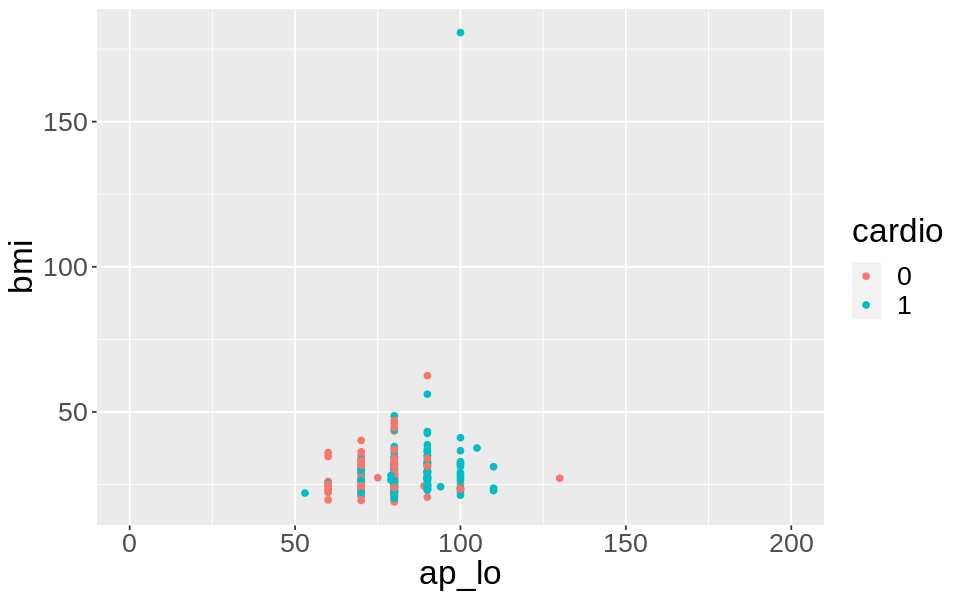

In [26]:
options(repr.plot.height = 5, repr.plot.width = 8)
plot <- ggplot(card_sample, aes(x = ap_lo, y = bmi, color = cardio)) + 
    geom_point() +
    scale_x_continuous(limits = c(0,200)) +
    theme(text = element_text(size = 20))
plot

## Methods

Methods:
Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
Describe at least one way that you will visualize the results

## Expected outcomes and significance

What do you expect to find?
What impact could such findings have?
What future questions could this lead to?